In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset
dataset = pd.read_csv("wdbc.data", sep=",").values

# Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [2]:
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)

# Mean and Maximum
X6 = np.concatenate([X1,X3],axis=1)
X6 = X6.astype("float64")
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)


labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluate(final_data):
    report = np.empty([4,6])
    m,n = final_data.shape
    for i in range(5):
        np.random.seed(0)
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        logisticRegr = LogisticRegression()
        logisticRegr.fit(x_train,y_train)
        predictions = logisticRegr.predict(x_train)
        report[0,i] = classification_report(y_train,predictions,output_dict = True).get('accuracy')
        report[1,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('precision')
        report[2,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('recall')
        report[3,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('f1-score')
        cm = metrics.confusion_matrix(y_train, predictions)
        print("Confusion matrix:\n",cm)
        
    for j in range(4):
        report[j,5] = np.max(report[j,0:5])
    columns1 = ['Validation 1','Validation 2','Validation 3','Validation 4','Validation 5','Maximum']
    index1 = ['Accuracy','Precision','Recall','F1-Score']
    table = pd.DataFrame(data = report,columns=columns1,index=index1)
    display(table)



## Mean

In [4]:
# Mean
evaluate(final_data1)

Confusion matrix:
 [[267  15]
 [ 23 149]]
Confusion matrix:
 [[272  16]
 [ 24 142]]
Confusion matrix:
 [[273  15]
 [ 24 142]]
Confusion matrix:
 [[269  13]
 [ 21 151]]
Confusion matrix:
 [[277  12]
 [ 19 146]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.916300,0.911894,0.914097,0.925110,0.931718,0.931718
Precision,0.914613,0.908827,0.911825,0.924159,0.929931,0.929931
Recall,0.906544,0.899933,0.901669,0.915904,0.921663,0.921663
F1-Score,0.910236,0.904025,0.906295,0.919684,0.925517,0.925517


## Standard Error

In [5]:
# Standard Error
evaluate(final_data2)

Confusion matrix:
 [[269  13]
 [ 40 132]]
Confusion matrix:
 [[277  11]
 [ 40 126]]
Confusion matrix:
 [[277  11]
 [ 38 128]]
Confusion matrix:
 [[271  11]
 [ 37 135]]
Confusion matrix:
 [[277  12]
 [ 39 126]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.883260,0.887665,0.892070,0.894273,0.887665,0.894273
Precision,0.890447,0.896763,0.900114,0.902264,0.894813,0.902264
Recall,0.860671,0.860421,0.866445,0.872938,0.861057,0.872938
F1-Score,0.871565,0.873693,0.879042,0.883850,0.873693,0.883850


## Maximum

In [6]:
# Maximum
evaluate(final_data3)

Confusion matrix:
 [[274   8]
 [ 15 157]]
Confusion matrix:
 [[281   7]
 [ 13 153]]
Confusion matrix:
 [[283   5]
 [ 14 152]]
Confusion matrix:
 [[275   7]
 [ 12 160]]
Confusion matrix:
 [[283   6]
 [ 13 152]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.949339,0.955947,0.958150,0.958150,0.958150,0.958150
Precision,0.949806,0.956016,0.960507,0.958136,0.959053,0.960507
Recall,0.942211,0.948691,0.949151,0.952705,0.950225,0.952705
F1-Score,0.945735,0.952143,0.954349,0.955280,0.954349,0.955280


## Mean and Standard Error

In [7]:
# Mean and Standard Error
evaluate(final_data4)

Confusion matrix:
 [[273   9]
 [ 25 147]]
Confusion matrix:
 [[280   8]
 [ 21 145]]
Confusion matrix:
 [[279   9]
 [ 20 146]]
Confusion matrix:
 [[271  11]
 [ 21 151]]
Confusion matrix:
 [[280   9]
 [ 23 142]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.925110,0.936123,0.936123,0.929515,0.929515,0.936123
Precision,0.929208,0.938972,0.937523,0.930090,0.932245,0.938972
Recall,0.911368,0.922858,0.924134,0.919450,0.914732,0.924134
F1-Score,0.918860,0.929927,0.930127,0.924221,0.922340,0.930127


## Standard Error and Maximum

In [8]:
# Standard Error and Maximum
evaluate(final_data5)

Confusion matrix:
 [[275   7]
 [ 14 158]]
Confusion matrix:
 [[282   6]
 [ 13 153]]
Confusion matrix:
 [[283   5]
 [ 14 152]]
Confusion matrix:
 [[275   7]
 [ 13 159]]
Confusion matrix:
 [[282   7]
 [ 14 151]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.953744,0.958150,0.958150,0.955947,0.953744,0.958150
Precision,0.954566,0.959098,0.960507,0.956346,0.954199,0.960507
Recall,0.946891,0.950427,0.949151,0.949798,0.945465,0.950427
F1-Score,0.950454,0.954474,0.954349,0.952870,0.949544,0.954474


## Mean and Maximum

In [9]:
# Mean and Maximum
evaluate(final_data6)

Confusion matrix:
 [[273   9]
 [ 13 159]]
Confusion matrix:
 [[282   6]
 [ 13 153]]
Confusion matrix:
 [[283   5]
 [ 13 153]]
Confusion matrix:
 [[274   8]
 [ 10 162]]
Confusion matrix:
 [[280   9]
 [ 14 151]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.951542,0.958150,0.960352,0.960352,0.949339,0.960352
Precision,0.950487,0.959098,0.962218,0.958865,0.948065,0.962218
Recall,0.946252,0.950427,0.952163,0.956746,0.942005,0.956746
F1-Score,0.948281,0.954474,0.956811,0.957783,0.944890,0.957783


## Mean, Standard Error and Maximum

In [10]:
# Mean, Standard Error and Maximum
evaluate(final_data7)

Confusion matrix:
 [[272  10]
 [ 16 156]]
Confusion matrix:
 [[279   9]
 [ 15 151]]
Confusion matrix:
 [[279   9]
 [ 12 154]]
Confusion matrix:
 [[276   6]
 [ 12 160]]
Confusion matrix:
 [[281   8]
 [ 12 153]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.942731,0.947137,0.953744,0.960352,0.955947,0.960352
Precision,0.942102,0.946365,0.951774,0.961094,0.954677,0.961094
Recall,0.935758,0.939194,0.948230,0.954478,0.949796,0.954478
F1-Score,0.938731,0.942572,0.949950,0.957583,0.952143,0.957583


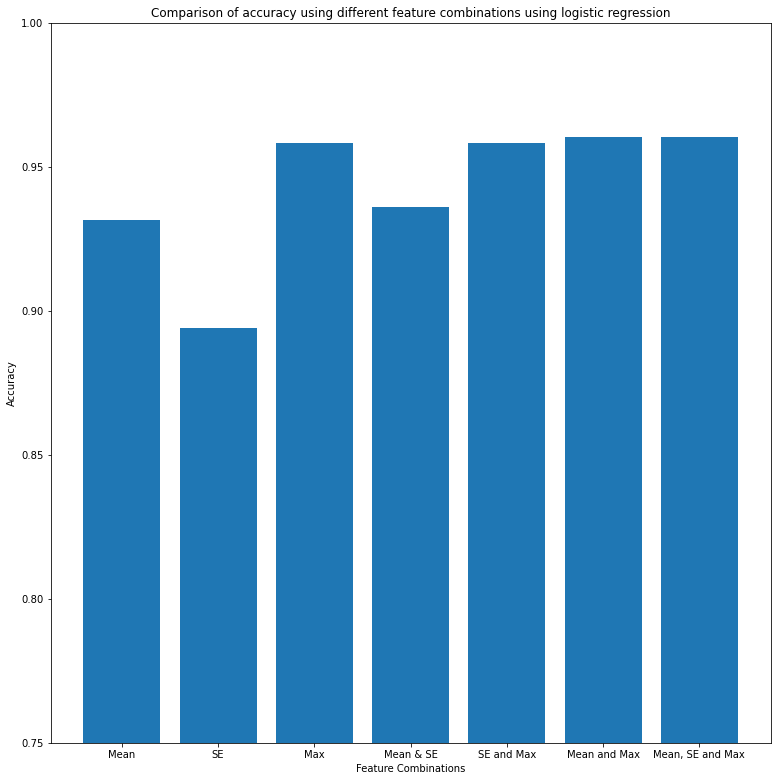

In [12]:
# The bar graph below shows the accuracy for the training set. A similar procedure was followed for the test set as well.
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
feature_comb = ['Mean', 'SE', 'Max', 'Mean & SE', 'SE and Max', 'Mean and Max', 'Mean, SE and Max']
accuracy = [0.9317,0.8942,0.9581,0.9361,0.9581,0.9603,0.9603]
ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of accuracy using different feature combinations using logistic regression')
ax.set_ylim([0.75,1])
plt.show()